In [1]:
#Basic libraries
import pandas as pd
import numpy as np 
import numpy as np

#Vizualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

#Modeling Tools
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import statsmodels.api as sm

from datetime import date

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

#Custom functions
from env import host, user, password #Database credentials
import wrangle3

In [2]:
train, X_train, y_train, X_validate, y_validate, X_test, y_test= wrangle3.wrangle()

In [3]:
train.shape

(36384, 33)

In [4]:
X_train.shape

(36384, 42)

In [5]:
train.head()

,Unnamed: 0,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,...,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_bins,baseline
21580,21580,11204960,-0.015033,3.0,4.0,2000.0,6037.0,34561695.0,-118082751.0,6999.0,...,0.2,0.4,52.438500,0.2,3.745249,0.1,0.750000,0,"(-0.05, 0.05]",0.017913
32781,32781,14323862,0.158456,6.0,6.0,7393.0,6059.0,33601524.0,-117845231.0,24000.0,...,0.4,0.9,210.471527,0.6,37.246958,0.3,1.000000,0,"(0.05, 0.2]",0.017913
33161,33161,12205584,-0.017737,2.0,3.0,1778.0,6037.0,33966002.0,-118298627.0,4948.0,...,0.1,0.4,48.931384,0.1,52.546483,0.4,0.666667,1,"(-0.05, 0.05]",0.017913
45785,45785,12078527,0.066846,3.0,4.0,2777.0,6037.0,34166013.0,-118218530.0,9989.0,...,0.2,0.6,116.075621,0.4,55.362198,0.4,0.750000,0,"(0.05, 0.2]",0.017913
45820,45820,14266520,-0.022133,3.0,4.0,1939.0,6059.0,33706702.0,-117898677.0,6028.0,...,0.1,0.4,71.851986,0.2,31.237890,0.3,0.750000,0,"(-0.05, 0.05]",0.017913


In [6]:
X_train.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate,scaled_bedroomcnt,scaled_lotsizesquarefeet,scaled_age,scaled_acres,scaled_bath_bed_ratio,scaled_calculatedfinishedsquarefeet
21580,21580,11204960,3.0,4.0,2000.0,6037.0,34561695.0,-118082751.0,6999.0,40227.0,...,0.829634,0.731775,0.333333,0.203380,0.500000,0.008825,0.213235,0.008825,0.196429,0.172850
32781,32781,14323862,6.0,6.0,7393.0,6059.0,33601524.0,-117845231.0,24000.0,40009.0,...,0.177142,0.856593,0.833333,0.123723,0.833333,0.031010,0.154412,0.031010,0.285714,0.741252
33161,33161,12205584,2.0,3.0,1778.0,6037.0,33966002.0,-118298627.0,4948.0,12447.0,...,0.424826,0.618331,0.166667,0.124023,0.333333,0.006149,0.588235,0.006149,0.166667,0.149452
45785,45785,12078527,3.0,4.0,2777.0,6037.0,34166013.0,-118218530.0,9989.0,45457.0,...,0.560745,0.660422,0.333333,0.111039,0.500000,0.012727,0.191176,0.012727,0.196429,0.254743
45820,45820,14266520,3.0,4.0,1939.0,6059.0,33706702.0,-117898677.0,6028.0,47568.0,...,0.248617,0.828507,0.333333,0.121312,0.500000,0.007558,0.330882,0.007558,0.196429,0.166421


In [16]:
train.area_cluster


AttributeError: 'DataFrame' object has no attribute 'area_cluster'

In [8]:
X_train.baseline.value_counts()

0.017913    36384
Name: baseline, dtype: int64

In [9]:
train.baseline.value_counts()

0.017913    36384
Name: baseline, dtype: int64

In [10]:
X_train.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,scaled_latitude,scaled_longitude,scaled_bathroomcnt,scaled_taxrate,scaled_bedroomcnt,scaled_lotsizesquarefeet,scaled_age,scaled_acres,scaled_bath_bed_ratio,scaled_calculatedfinishedsquarefeet
21580,21580,11204960,3.0,4.0,2000.0,6037.0,34561695.0,-118082751.0,6999.0,40227.0,...,0.829634,0.731775,0.333333,0.203380,0.500000,0.008825,0.213235,0.008825,0.196429,0.172850
32781,32781,14323862,6.0,6.0,7393.0,6059.0,33601524.0,-117845231.0,24000.0,40009.0,...,0.177142,0.856593,0.833333,0.123723,0.833333,0.031010,0.154412,0.031010,0.285714,0.741252
33161,33161,12205584,2.0,3.0,1778.0,6037.0,33966002.0,-118298627.0,4948.0,12447.0,...,0.424826,0.618331,0.166667,0.124023,0.333333,0.006149,0.588235,0.006149,0.166667,0.149452
45785,45785,12078527,3.0,4.0,2777.0,6037.0,34166013.0,-118218530.0,9989.0,45457.0,...,0.560745,0.660422,0.333333,0.111039,0.500000,0.012727,0.191176,0.012727,0.196429,0.254743
45820,45820,14266520,3.0,4.0,1939.0,6059.0,33706702.0,-117898677.0,6028.0,47568.0,...,0.248617,0.828507,0.333333,0.121312,0.500000,0.007558,0.330882,0.007558,0.196429,0.166421


In [11]:
train.columns
# likely look to remove Unamed: 0, parcelid, fips (maybe keep for hue), regioncity, regionidzipm 

Index(['Unnamed: 0', 'parcelid', 'logerror', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'regionidcity', 'regionidcounty', 'regionidzip',
       'yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'county', 'age', 'age_bin',
       'taxrate', 'acres', 'acres_bin', 'sqft_bin',
       'structure_dollar_per_sqft', 'structure_dollar_sqft_bin',
       'land_dollar_per_sqft', 'lot_dollar_sqft_bin', 'bath_bed_ratio', 'cola',
       'logerror_bins', 'baseline'],
      dtype='object')

In [12]:
#kmeans.predict

<AxesSubplot:>

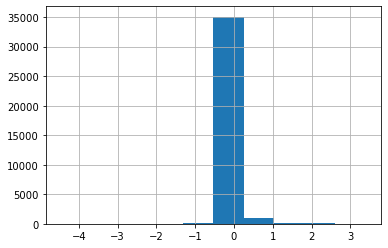

In [13]:
train.logerror.hist()
#plt.xlim(xmin=-5, xmax = 1.5);

In [14]:
sns.relplot(data = train, x='latitude', y='')

ValueError: Could not interpret value `` for parameter `y`


## area cluster  = lat, long, age 

### - Exploration: the interaction between independent variables and the target variable is explored using visualization and statistical testing
### - Exploration: Clustering is used to explore the data. A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful. At least 3 combinations of features for clustering should be tried.
### - Modeling: At least 4 different models are created and their performance is compared. One model is the distinct combination of algorithm, hyperparameters, and features.

### Goals: 01/05/21

- location and age clusters - 

- Log error vizual of data
- Geographical mapping of lat, long (research)
- correlation map
    - follow with an idea of statistical tests to use
- elbow method / k 
- Preliminary modeling


features = lat, long, age, bath_bed ratio, lotsizesquarefeet or area, 